In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal, norm, gamma

# Activity - 1

In [9]:
N_values = [1, 2, 10]  # Number of variables to sum
num_samples = 10000  # Number of samples

#Dictionary 
results = {}

for N in N_values:
    rand_samples = np.random.uniform(0, 1, (num_samples, N))
    rand_samples_means = np.mean(rand_samples, axis=1)

    results[f'rand_samples_{N}'] = rand_samples
    results[f'rand_samples_means_{N}'] = rand_samples_means
    
#print(results['rand_samples_2'])
#print(results['rand_samples_means_2'])

#plt.hist(results['rand_samples_means_10'], bins = 20)

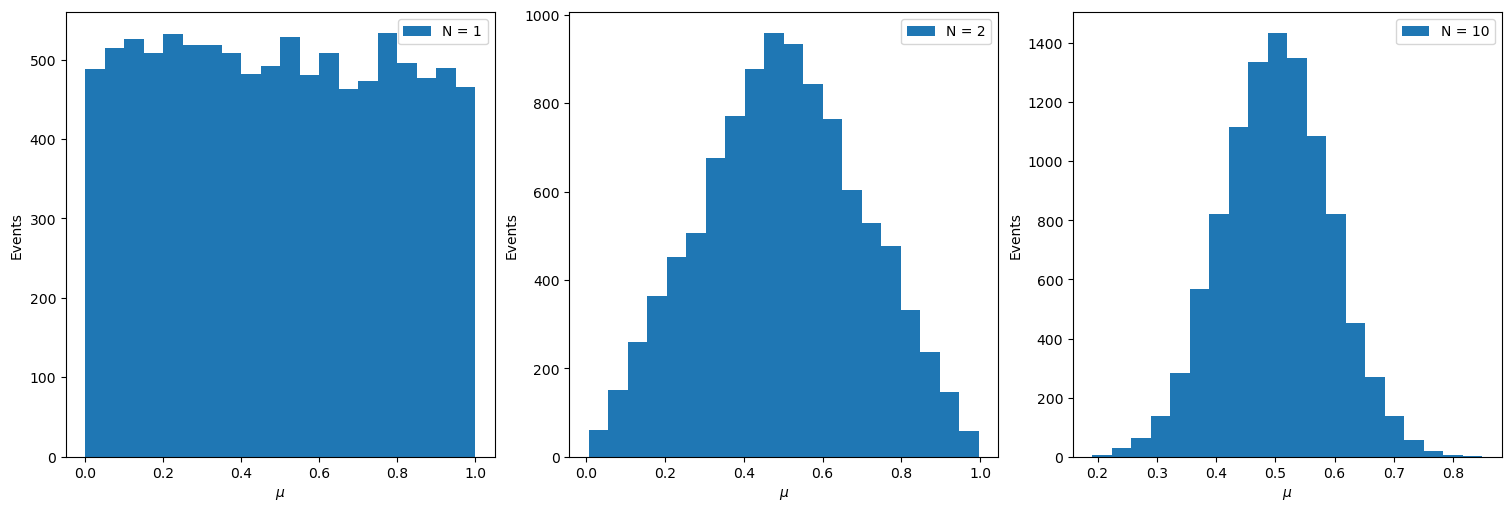

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

for i, num in enumerate(N_values):
    axes[i].hist(results[f'rand_samples_means_{num}'], bins = 20, label = f"N = {num}")
    axes[i].legend()
    axes[i].set_xlabel('$\mu$')
    axes[i].set_ylabel('Events')

plt.show()

0.5016469740554441 0.09054792305615382


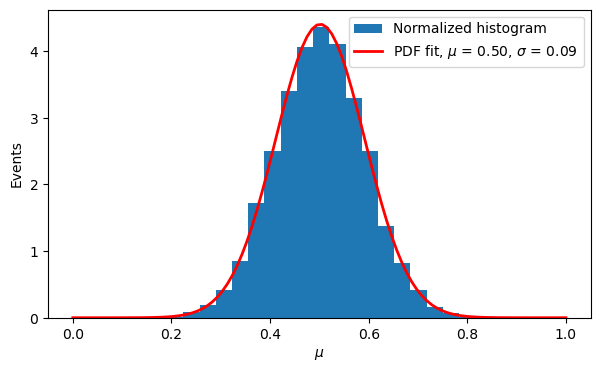

In [11]:
mu, std = norm.fit(results['rand_samples_means_10'])
print(mu, std)

x = np.linspace(0, 1, 100)
p = norm.pdf(x, mu, std)

#Plotting
plt.figure(figsize=(7, 4))
plt.hist(results['rand_samples_means_10'], bins = 20, density=1, label = 'Normalized histogram')
plt.plot(x, p, c='red', linewidth=2, label = f'PDF fit, $\\mu$ = {mu:.2f}, $\\sigma$ = {std:.2f}')
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('Events')
plt.show()

# Activity - 2
## Analysis - 1

In [4]:
cov = np.array([[4, 2], [2, 16]])
mean = np.array([0, 0])

In [5]:
events = np.random.multivariate_normal(mean, cov, 1000)
x_coord, y_coord = events[:,0], events[:,1]

In [13]:
#print(x_coord, y_coord)

## Analysis - 2.

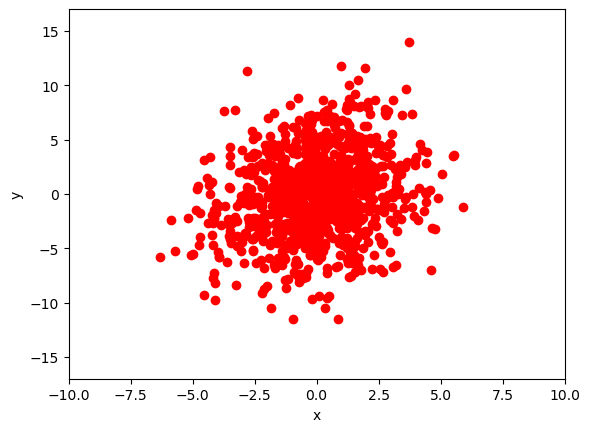

In [6]:
plt.scatter(x_coord, y_coord, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10, 10)
plt.ylim(-17, 17)
plt.savefig("x_vs_y_covariance")
plt.show()

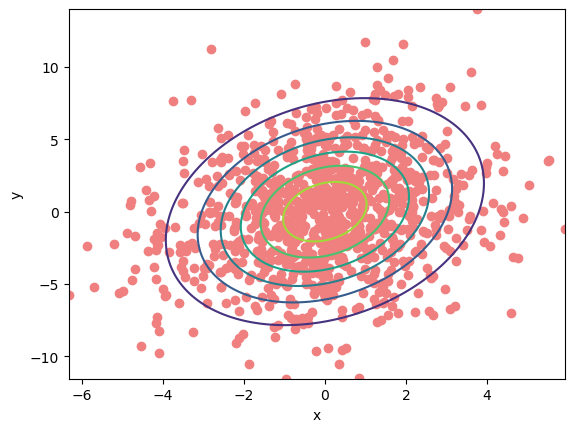

In [8]:
#generate a grid and define pdf for grid points
x = np.linspace(min(x_coord), max(x_coord), 500)
y = np.linspace(min(y_coord), max(y_coord), 500)
X, Y = np.meshgrid(x, y)
grid = np.dstack((X, Y))
Z = multivariate_normal(mean, cov).pdf(grid)
contour = plt.contour(X, Y, Z) 
#plt.colorbar(contour)
plt.scatter(x_coord, y_coord, c='lightcoral') #facecolors='none', edgecolors='white', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("x_vs_y_with_contour")
plt.show()

# Activity - 3

In [5]:
N = 100 # Number of variables to sum
num_samples = 1  # Number of samples

data = np.random.normal(loc=0, scale=1, size=N)
true_mu = 0
true_sigma = 1
#print(data)
data.shape

(100,)

In [6]:
mu_ML = np.sum(data)/N
Sigma_ML = np.sum(np.dot((data - mu_ML), (data - mu_ML).T))/N
E_mu_ML = 0
E_sigma_ML = (N - 1) * true_sigma / N

In [7]:
print(mu_ML, Sigma_ML)
print(E_mu_ML, E_sigma_ML)

0.012127541149153044 0.9600392770679571
0 0.99


In [8]:
N = 1000 # sample space


data = np.random.normal(loc=0, scale=1, size=N) 


def Sequential_estimator(data):
    N = len(data)
    n = np.arange(1, N+1)
    mu_exp = np.array([])
    var_exp = np.array([])

    #initialize the parameters
    mu = -0.3 
    var = 0.0

    for i, element in enumerate(data):
        if i != 0:
            mu_prev = mu
            mu = mu + (1/i) * (element - mu) #updating mu at each step

            var = ((i-1)*var + (element - mu)*(element - mu_prev))/i #updating variance at each step

            mu_exp = np.append(mu_exp, mu) #updating mean array with updated means with updated sample space
            var_exp = np.append(var_exp, var) #updating variance array with updated variance with updated sample space

    return mu_exp, var_exp

mu_ML, var_ML = Sequential_estimator(data)
sigma_ML = np.sqrt(var_ML)


/var/folders/wf/g8gqpsyj7450s95dwb4bbg7c0000gn/T/ipykernel_2510/2455490980.py:30: RuntimeWarning: invalid value encountered in sqrt
  sigma_ML = np.sqrt(var_ML)


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wf/g8gqpsyj7450s95dwb4bbg7c0000gn/T/ipykernel_2510/2138182990.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(range(2, N + 1), mu_ML, label="Sequential $\mu$", color="blue")
/var/folders/wf/g8gqpsyj7450s95dwb4bbg7c0000gn/T/ipykernel_2510/2138182990.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.axhline(true_mu, color="red", linestyle="--", label="True $\mu$")


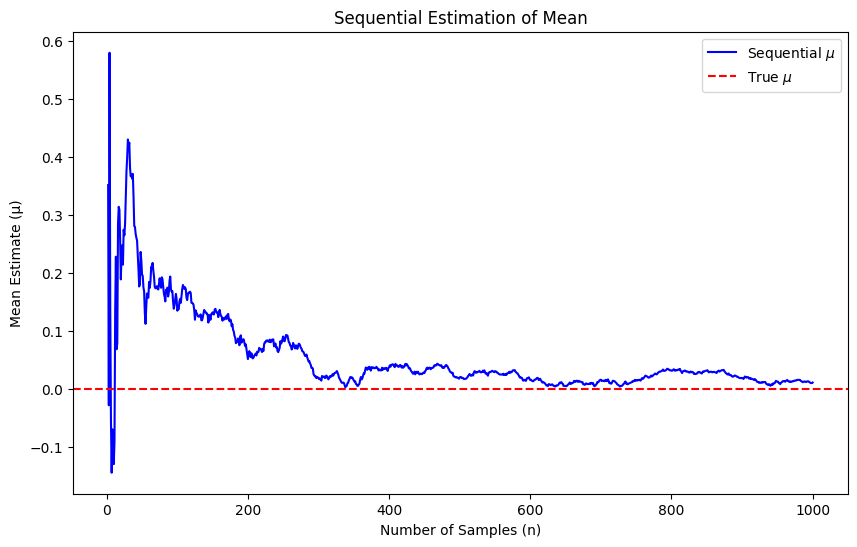

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, N + 1), mu_ML, label="Sequential $\mu$", color="blue")
plt.axhline(true_mu, color="red", linestyle="--", label="True $\mu$")
plt.xlabel("Number of Samples (n)")
plt.ylabel("Mean Estimate (μ)")
plt.title("Sequential Estimation of Mean")
plt.legend()
plt.savefig('sequential_mean')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wf/g8gqpsyj7450s95dwb4bbg7c0000gn/T/ipykernel_2510/1646642558.py:2: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(range(2, N+1), var_ML, label="Sequential $\sigma^2$", color="blue")
/var/folders/wf/g8gqpsyj7450s95dwb4bbg7c0000gn/T/ipykernel_2510/1646642558.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.axhline(true_sigma**2, color="red", linestyle="--", label="True $\sigma^2$")
/var/folders/wf/g8gqpsyj7450s95dwb4bbg7c0000gn/T/ipykernel_2510/1646642558.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("Variance_Estimate($\sigma^2$)")


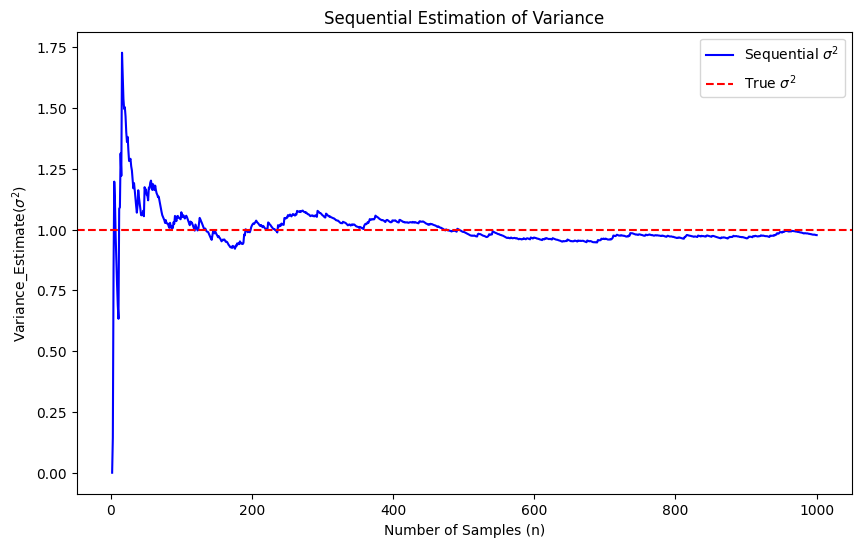

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, N+1), var_ML, label="Sequential $\sigma^2$", color="blue")
plt.axhline(true_sigma**2, color="red", linestyle="--", label="True $\sigma^2$")
plt.xlabel("Number of Samples (n)")
plt.ylabel("Variance_Estimate($\sigma^2$)")
plt.title("Sequential Estimation of Variance")
plt.legend()
plt.savefig('sequential_variance')
plt.show()

### Activity 4

In [3]:
def calculate_mu_N(sigma, sigma_0, mu_ML, mu_0, N):
    return ((sigma**2 * mu_0) + (N * (sigma_0 ** 2) * mu_ML))/(N* (sigma_0**2) + sigma**2)

def calculate_sigma_N(sigma, sigma_0, N):
    return np.sqrt((sigma**2)* (sigma_0**2)/(N* (sigma_0**2) + sigma**2))

def calculate_a_N(a_0, N):
    return a_0 + N/2

def calculate_b_N(b_0, N, sig_ML_2):
    return b_0 + (N*sig_ML_2)/2

def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def gamma_dist(x, a, b):
    return (b**a) * (x**(a-1)) * np.exp(-b*x) / gamma(a)

In [7]:
N = [0, 1, 2, 10, 100]
mu_ML, sig_ML_2, mu_N, sigma_N, a_N, b_N = (np.zeros(len(N)) for _ in range(6))

mu, sigma = 0.8, 0.1 # mean and standard deviation for data

#we will pretend we do not know mu, but we know the sigma, i.e sigma enters our calculation of posterior

x = np.linspace(-1, 1, 1000)  # X values for plotting

for i, val in enumerate(N):
    x_n = np.random.normal(mu, sigma, val) #this is our gaussian dataset with mu and sigma defined above
    
    if val != 0:
        mu_ML[i] = np.sum(x_n)/val
        sig_ML_2[i] = np.sum((x_n - mu_ML[i])**2)/val

    if val == 0: #to avoid errors bcos mu_ML is inversely proportional to N
        mu_ML[i] = 0
        sig_ML_2[i] = 0   

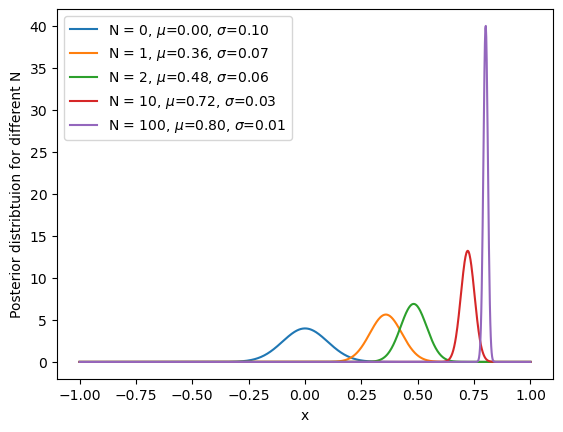

In [8]:
#now find mu and sigma of posterior for unknown mu
# first let us take mu_0 and sigma_0 for the prior now
mu_0, sigma_0 = 0, 0.1
for i, val in enumerate(N): 
    mu_N[i] = calculate_mu_N(sigma, sigma_0, mu_ML[i], mu_0, val)
    sigma_N[i] = calculate_sigma_N(sigma, sigma_0, val)

    y = gaussian(x, mu_N[i], sigma_N[i])
    plt.plot(x, y, label=f'N = {val}, $\mu$={mu_N[i]:.2f}, $\sigma$={sigma_N[i]:.2f}')
plt.xlabel("x")
plt.ylabel("Posterior distribtuion for different N")
plt.legend()
plt.show()

For (a_0, b_0) = (4, 6), N=0: Variance of gaussian=1.22
For (a_0, b_0) = (4, 6), N=1: Variance of gaussian=1.15
For (a_0, b_0) = (4, 6), N=2: Variance of gaussian=1.10
For (a_0, b_0) = (4, 6), N=10: Variance of gaussian=0.82
For (a_0, b_0) = (4, 6), N=100: Variance of gaussian=0.33
For (a_0, b_0) = (1, 1), N=0: Variance of gaussian=1.00
For (a_0, b_0) = (1, 1), N=1: Variance of gaussian=0.82
For (a_0, b_0) = (1, 1), N=2: Variance of gaussian=0.71
For (a_0, b_0) = (1, 1), N=10: Variance of gaussian=0.41
For (a_0, b_0) = (1, 1), N=100: Variance of gaussian=0.14
For (a_0, b_0) = (0.1, 0.1), N=0: Variance of gaussian=1.00
For (a_0, b_0) = (0.1, 0.1), N=1: Variance of gaussian=0.41
For (a_0, b_0) = (0.1, 0.1), N=2: Variance of gaussian=0.30
For (a_0, b_0) = (0.1, 0.1), N=10: Variance of gaussian=0.14
For (a_0, b_0) = (0.1, 0.1), N=100: Variance of gaussian=0.04


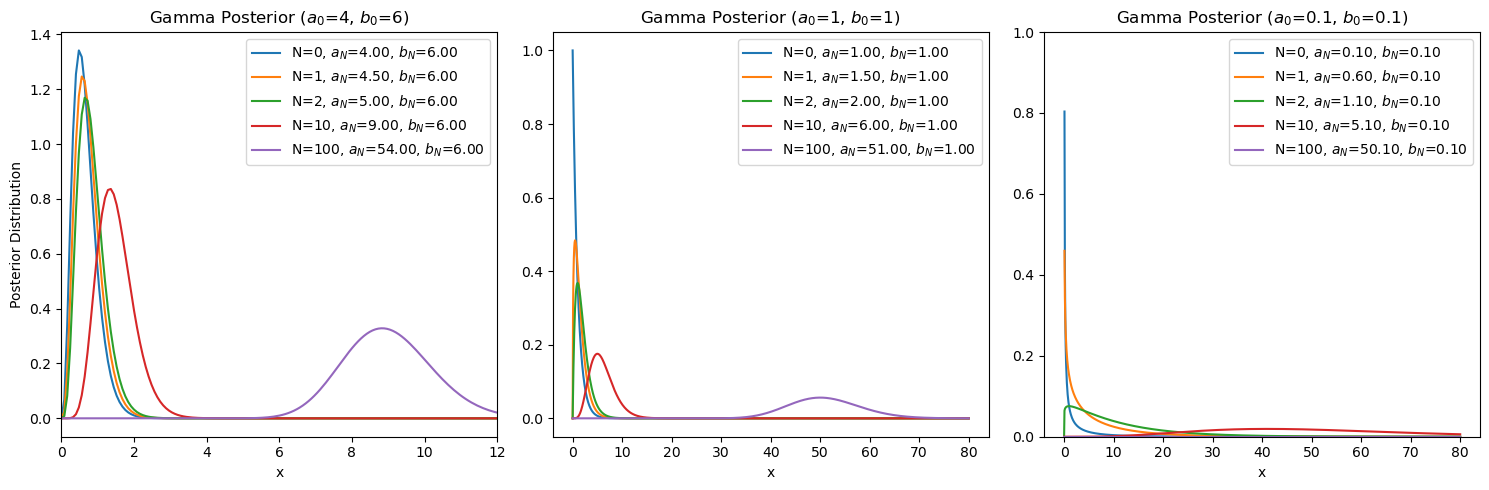

In [9]:
# Different sets of (a_0, b_0) parameters
a_b_sets = [(4, 6), (1, 1), (0.1, 0.1)]  # Three different (a_0, b_0) pairs

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

lamb = np.linspace(0, 80, 1000)  # X values for plotting

for idx, (a_0, b_0) in enumerate(a_b_sets):  
    # Initialize arrays
    a_N, b_N = np.zeros(len(N)), np.zeros(len(N))
    sig_ML_2 = np.zeros(len(N))  # Assuming this is defined

    for i, val in enumerate(N):
        # Compute posterior parameters
        a_N[i] = a_0 + val / 2
        b_N[i] = b_0 + (val * sig_ML_2[i]) / 2

        # Compute posterior mean and variance
        mean_post = a_N[i] / b_N[i]
        var_post = a_N[i] / (b_N[i] ** 2)
        gauss_var_post = np.sqrt(b_N[i]/a_N[i])
        print(f"For (a_0, b_0) = ({a_0}, {b_0}), N={val}: Variance of gaussian={gauss_var_post:.2f}")

        # Compute Gamma PDF
        y1 = gamma.pdf(lamb, a_N[i], scale=1 / b_N[i])

        # Plot on the corresponding subplot
        axes[idx].plot(lamb, y1, label=f'N={val}, $a_N$={a_N[i]:.2f}, $b_N$={b_N[i]:.2f}')

    # Labeling each subplot
    axes[idx].set_title(f'Gamma Posterior ($a_0$={a_0}, $b_0$={b_0})')
    axes[idx].set_xlabel("x")
    axes[idx].legend()

# Common Y-label
axes[0].set_ylabel("Posterior Distribution")
#axes[2].set_ylim(0, 2)
axes[0].set_xlim(0, 12)
axes[2].set_ylim(0,1)

plt.tight_layout()
plt.show()

#### The approach of variance to its true value not only depends on N but also on the prior parameters a_0 and b_0. For higher values of a_0 and b_0, it takes more iterations to reach the true value as seen above.